###### Principal Component Analysis

January 26, 2022

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

This is an excerpt from the Python Data Science Handbook by Jake VanderPlas

## Principal component analysis (PCA) is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more. 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

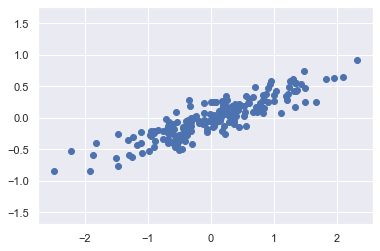

In [3]:
# make a synthetic dataset of 200 random points with slope of 1/2 and noise

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T   # fancy way to make random numbers
                                                  # ".T" transposes matrix (exchange rows/columns)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

"This is reminiscent of linear regression data ... but the problem setting here is slightly different: rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values."

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

"The fit learns some quantities from the data, most importantly the "components" and "explained variance""

In [5]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


"To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:"

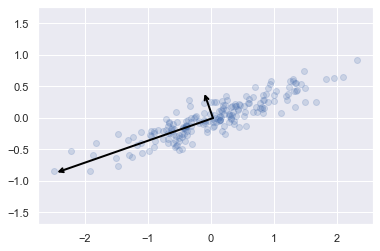

In [7]:
# make a short piece of code ("function,"" or "subroutine") for drawing a line with an arrow 
# this allows us to re-use this routine as needed elsewhere in the workbook

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color="black")
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
    
    

# plot data using this 

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

## PCA as dimensionality reduction

In [8]:
# start with two-dimensional data
# find the first principal component (which explains most of the variance)
# transform original data back to this lower dimensionality (from 2 to 1 dimension
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


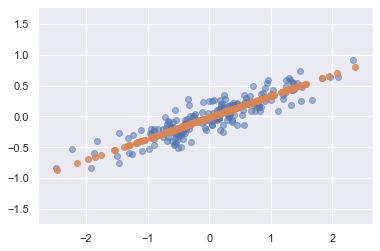

In [9]:
# compare original two-dimensional data to transformed lower dimension
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

## PCA for visualization: Hand-written digits

In [10]:
# dataset of handwritten digits (each image is 8x8 grid, with gray-scale intensity.  So start 64-dimensional)
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

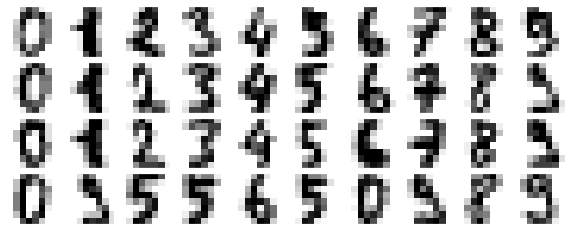

In [11]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [12]:
# perform the Principal Component Analysis
pca = PCA(n_components=2)                                     # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)          
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


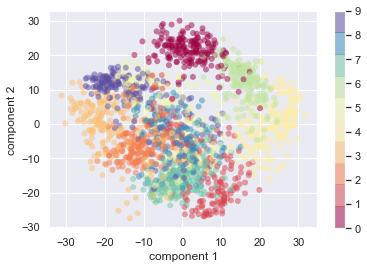

In [13]:
# plot data, now in 2 dimensions (instead of 64) 
# use different colors for different (known) digit identities

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

[1.48905936e-01 1.36187712e-01 1.17945938e-01 8.40997942e-02
 5.78241466e-02 4.91691032e-02 4.31598701e-02 3.66137258e-02
 3.35324810e-02 3.07880621e-02 2.37234084e-02 2.27269657e-02
 1.82186331e-02 1.77385494e-02 1.46710109e-02 1.40971560e-02
 1.31858920e-02 1.24813782e-02 1.01771796e-02 9.05617439e-03
 8.89538461e-03 7.97123157e-03 7.67493255e-03 7.22903569e-03
 6.95888851e-03 5.96081458e-03 5.75614688e-03 5.15157582e-03
 4.89539777e-03 4.28887968e-03 3.73606048e-03 3.53274223e-03
 3.36683986e-03 3.28029851e-03 3.08320884e-03 2.93778629e-03
 2.56588609e-03 2.27742397e-03 2.22277922e-03 2.11430393e-03
 1.89909062e-03 1.58652907e-03 1.51159934e-03 1.40578764e-03
 1.16622290e-03 1.07492521e-03 9.64053065e-04 7.74630271e-04
 5.57211553e-04 4.04330693e-04 2.09916327e-04 8.24797098e-05
 5.25149980e-05 5.05243719e-05 3.29961363e-05 1.24365445e-05
 7.04827911e-06 3.01432139e-06 1.06230800e-06 5.50074587e-07
 3.42905702e-07 9.50687638e-34 9.50687638e-34 9.36179501e-34]


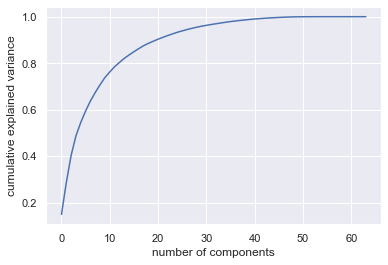

In [14]:
# cumulative variance explained as a function of number of PCs
# note: by definition, 64 PC's captures all of the variation 
pca = PCA().fit(digits.data)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## PCA as Noise Filtering

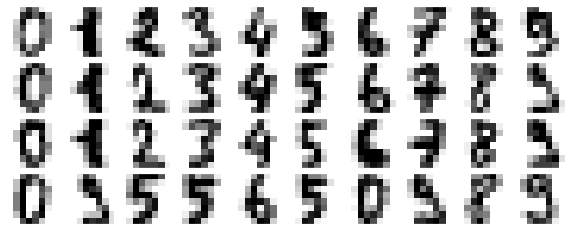

In [15]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

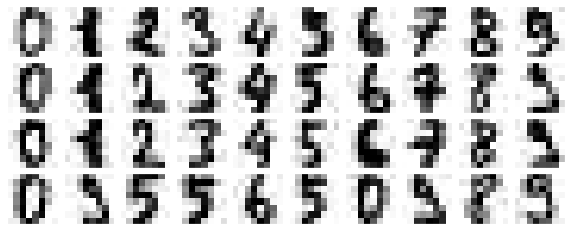

In [16]:
# now add some noise
np.random.seed(42)
noisy = np.random.normal(digits.data, 1)
plot_digits(noisy)

In [17]:
pca = PCA(0.50).fit(noisy)      # calling PCA with a number between 0 and 1 asks for enough components to explain 
                                # that fraction of the variance.  We see from plot above that this will be ~10-12
pca.n_components_

5

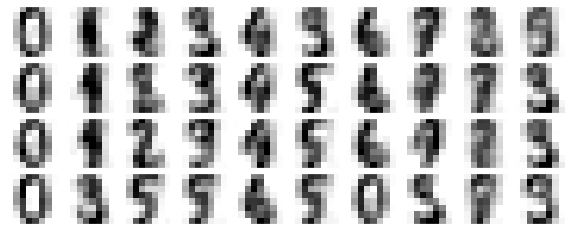

In [18]:
# flow: start from noisy data. Find PCs that account for half the variance. 
# transform from those 12 components back to original "coordinates" (i.e, the image)
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## Eigenfaces: looking at principal component loadings

In [19]:
# database of 1348 thumbnails of 8 people: 62x47 = 2914-dimensional data

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [20]:
62*47

2914

In [21]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

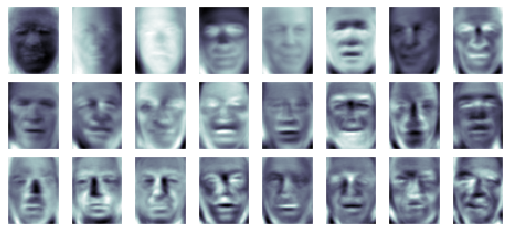

In [22]:
# plot the "eigenfaces": these are the images that progressively account for mroe and more variation in the data.
# backtransforming expresses the 2914-dimensional data back in terms of these "natural" entities.
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

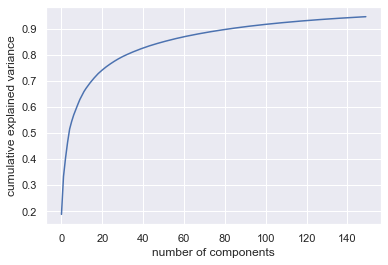

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [24]:
# Compute the components and projected faces with 150 PCs (<< 2914!)
# this accounts for 95% of the variation
pca = PCA(10).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

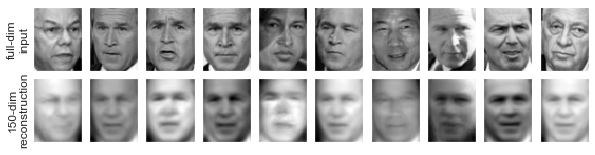

In [64]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');